In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.image import pad_to_bounding_box
from tensorflow.image import central_crop
from tensorflow.image import resize
from PIL import Image
import os
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
for i in range(200):
    img = Image.open(f'workplace/tf_image/train_{i:03d}.jpg').convert('RGB')
    img.resize((500,150)).save(f'workplace/tf_image/train_{i:03d}.jpg')
for i in range(60):
    img = Image.open(f'workplace/tf_image/test_{i:03d}.jpg').convert("RGB")
    img.resize((500,150)).save(f'workplace/tf_image/test_{i:03d}.jpg')

In [3]:
train_image_paths = [os.path.join(f"workplace/tf_image/train_{i:03d}.jpg") for i in range(200)]
test_image_paths = [os.path.join(f"workplace/tf_image/test_{i:03d}.jpg")for i in range(60)]

In [4]:
train_X = []
for i in train_image_paths:
    daehan = image.load_img(i)
    daehan_vector = np.array(image.img_to_array(daehan))
    daehan_vector = daehan_vector/255
    train_X.append(daehan_vector)
    
test_X = []
for i in test_image_paths:
    daehan_test = image.load_img(i)
    daehan_test_vector = np.array(image.img_to_array(daehan_test))
    daehan_test_vector = daehan_test_vector/255
    test_X.append(daehan_test_vector)

In [5]:
train_X

[array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]], dtype=float32),
 array([[[1., 1., 1.],
         [1., 1.,

In [9]:
# numpy  배열로 변환
train_X = np.array(train_X)
test_X = np.array(test_X)

In [10]:
train_X

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

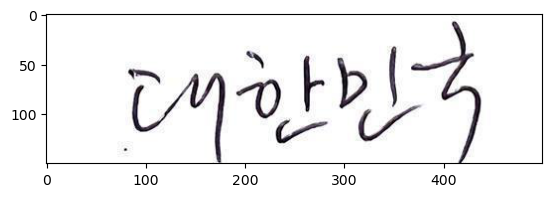

In [86]:
plt.imshow(daehan_vector)
plt.show()

In [6]:
train_y = []
for i in range(200):
    train_y.append(i // 10)

In [7]:
test_y = []
for i in range(60):
    test_y.append(i // 3)

In [89]:
# 범위는 0~19

train_y = keras.utils.to_categorical(train_y, num_classes = 20)
test_y = keras.utils.to_categorical(test_y, num_classes = 20)

In [125]:
# CNN 모델
cnn_model = keras.Sequential([
    keras.layers.Conv2D(45, (3, 3), activation='relu', input_shape=(150, 500, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(70, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(20, activation='softmax')])
    
# 모델 컴파일  
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
cnnpointer = ModelCheckpoint(filepath = "./data/model/daehan_cnn.hdf5",
                             monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
history = cnn_model.fit(train_X, train_y, validation_split=0.15, 
                        epochs=30, batch_size=100, verbose=1, 
                        callbacks=[early_stopping_callback, cnnpointer])

Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 11.4703 - accuracy: 0.0125   
Epoch 1: val_loss improved from inf to 22.68809, saving model to ./data/model\daehan_cnn.hdf5
2/2 [==============================] - 6s 3s/step - loss: 11.4703 - accuracy: 0.0125 - val_loss: 22.6881 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 10.5730 - accuracy: 0.0500
Epoch 2: val_loss improved from 22.68809 to 6.19106, saving model to ./data/model\daehan_cnn.hdf5
2/2 [==============================] - 6s 3s/step - loss: 10.5730 - accuracy: 0.0500 - val_loss: 6.1911 - val_accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 3.5110 - accuracy: 0.0938
Epoch 3: val_loss improved from 6.19106 to 3.72412, saving model to ./data/model\daehan_cnn.hdf5
2/2 [==============================] - 5s 2s/step - loss: 3.5110 - accuracy: 0.0938 - val_loss: 3.7241 - val_accuracy: 0.0000e+00
Epoch 4/30
2/2 [=====================

In [128]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_X, test_y)

2/2 [==============================] - 0s 185ms/step - loss: 5.8198 - accuracy: 0.5833


In [111]:
train_X.shape

(200, 150, 500, 3)

In [16]:
#DNN 모델

dnn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 500, 3)),
    keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(90, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(20, activation='softmax')
])

dnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

dnnpath = "./data/model/daehan_DNN.hdf5"

dnnpointer = ModelCheckpoint(filepath = dnnpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = dnn_model.fit(train_X, train_y, validation_split=0.2, epochs=100, batch_size=25, 
                        verbose=0, callbacks=[early_stopping_callback, dnnpointer])

dnn_test_loss, dnn_test_acc = dnn_model.evaluate(test_X, test_y)
                                                 


Epoch 1: val_loss improved from inf to 70.38153, saving model to ./data/model\daehan_DNN.hdf5

Epoch 2: val_loss improved from 70.38153 to 51.70374, saving model to ./data/model\daehan_DNN.hdf5

Epoch 3: val_loss improved from 51.70374 to 49.62080, saving model to ./data/model\daehan_DNN.hdf5

Epoch 4: val_loss improved from 49.62080 to 42.76982, saving model to ./data/model\daehan_DNN.hdf5

Epoch 5: val_loss improved from 42.76982 to 38.48302, saving model to ./data/model\daehan_DNN.hdf5

Epoch 6: val_loss improved from 38.48302 to 23.93860, saving model to ./data/model\daehan_DNN.hdf5

Epoch 7: val_loss improved from 23.93860 to 19.20769, saving model to ./data/model\daehan_DNN.hdf5

Epoch 8: val_loss did not improve from 19.20769

Epoch 9: val_loss improved from 19.20769 to 16.60565, saving model to ./data/model\daehan_DNN.hdf5

Epoch 10: val_loss improved from 16.60565 to 14.24836, saving model to ./data/model\daehan_DNN.hdf5

Epoch 11: val_loss improved from 14.24836 to 12.84441,

In [18]:
print("\n Test Accuracy: %f" % (dnn_model.evaluate(test_X, test_y)[1]))

2/2 [==============================] - 0s 14ms/step - loss: 3.9149 - accuracy: 0.1500

 Test Accuracy: 0.150000


In [8]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
apyori                        1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat  